# Window Functions

In [78]:
# Copyright (C) 2020 Danny Schneider
##
## This program is free software; you can redistribute it and/or
## modify it under the terms of the GNU General Public
## License as published by the Free Software Foundation;
## either version 2, or (at your option) any later version.
##
## Octave is distributed in the hope that it will be useful,
## but WITHOUT ANY WARRANTY; without even the implied
## warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR
## PURPOSE.  See the GNU General Public License for more
## details.
##
## You should have received a copy of the GNU General Public
## License along with Octave; see the file COPYING.  If not,
## write to the Free Software Foundation, 59 Temple Place -
## Suite 330, Boston, MA 02111-1307, USA.

In [79]:
nos=64;
XN=128;
n=0:1:nos-1;

<div class="pagebreak"></div>

## Window Functions

In [80]:
w_rec=ones(1,nos);
w_hann=0.5*(1-cos(2*pi*n/(nos-1)));
w_hamming=0.54-0.46*cos(2*pi*n/(nos-1));
w_bartlett=2/nos*(nos/2-abs(n-(nos-1)/2));

alpha=0.16;a0=(1-alpha)/2;a1=1/2;a2=alpha/2;
w_blackman=a0-a1*cos(2*pi*n/(nos-1))+a2*cos(4*pi*n/(nos-1));

alpha=3;
num=besseli(0,pi*alpha*sqrt(1-(2*n/(nos-1)-1).^2));
den=besseli(0,pi*alpha);
w_kaiser=num/den;

alpha=0.5;
w_gaussian=exp(-1/2*((n-(nos-1)/2)./(alpha*(nos-1)/2)).^2);

a0=1;a1=1.93;a2=1.29;a3=0.388;a4=0.032;
w_flattop=a0-a1*cos(2*pi*n/(nos-1))+a2*cos(4*pi*n/(nos-1))-a3*cos(6*pi*n/(nos-1))+a4*cos(8*pi*n/(nos-1));
w_flattop=w_flattop/max(w_flattop);

## Frequency Response of Window Functions

In [81]:
[W_REC,f]=freqz(w_rec,1,XN);
W_REC=W_REC./(max(abs(W_REC)));

[W_HANN,f]=freqz(w_hann,1,XN);
W_HANN=W_HANN./(max(abs(W_HANN)));

[W_HAMMING,f]=freqz(w_hamming,1,XN);
W_HAMMING=W_HAMMING./(max(abs(W_HAMMING)));

[W_BARTLETT,f]=freqz(w_bartlett,1,XN);
W_BARTLETT=W_BARTLETT./(max(abs(W_BARTLETT)));

[W_BLACKMAN,f]=freqz(w_blackman,1,XN);
W_BLACKMAN=W_BLACKMAN./(max(abs(W_BLACKMAN)));

[W_KAISER,f]=freqz(w_kaiser,1,XN);
W_KAISER=W_KAISER./(max(abs(W_KAISER)));

[W_GAUSSIAN,f]=freqz(w_gaussian,1,XN);
W_GAUSSIAN=W_GAUSSIAN./(max(abs(W_GAUSSIAN)));

[W_FLATTOP,f]=freqz(w_flattop,1,XN);
W_FLATTOP=W_FLATTOP./(max(abs(W_FLATTOP)));

<div class="pagebreak"></div>

## Plotting

fig =  1
ans =

    1   64



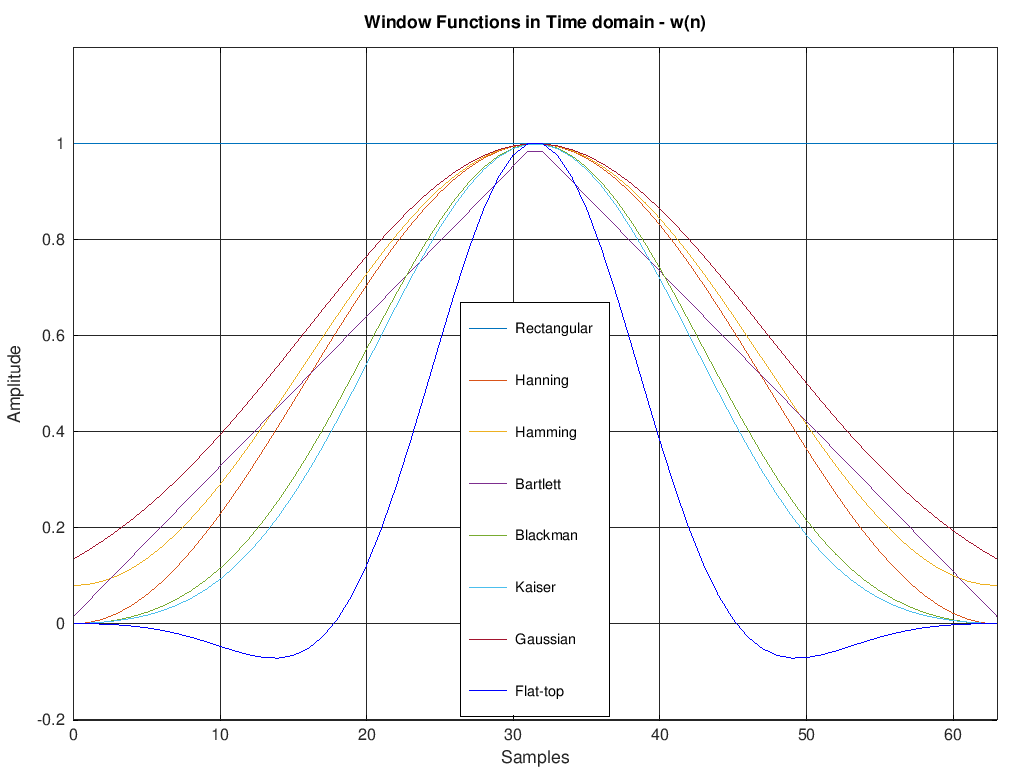

In [82]:
fig=1
figure(fig++);
size(w_rec)
handle=plot(n,[w_rec;w_hann;w_hamming;w_bartlett;w_blackman;w_kaiser;w_gaussian]);
set(handle,'linewidth',1.5);
hold on;
handle=plot(n,[w_flattop],'b-');
set(handle,'linewidth',1.5);
axis([0 nos-1 -0.2 1.2]);
grid on;
legend({'Rectangular','Hanning','Hamming','Bartlett','Blackman','Kaiser','Gaussian','Flat-top'},"location","south");
title('Window Functions in Time domain - w(n)');
xlabel('Samples');
ylabel('Amplitude');
%plot2svg

<div class="pagebreak"></div>

ans =

   128     1



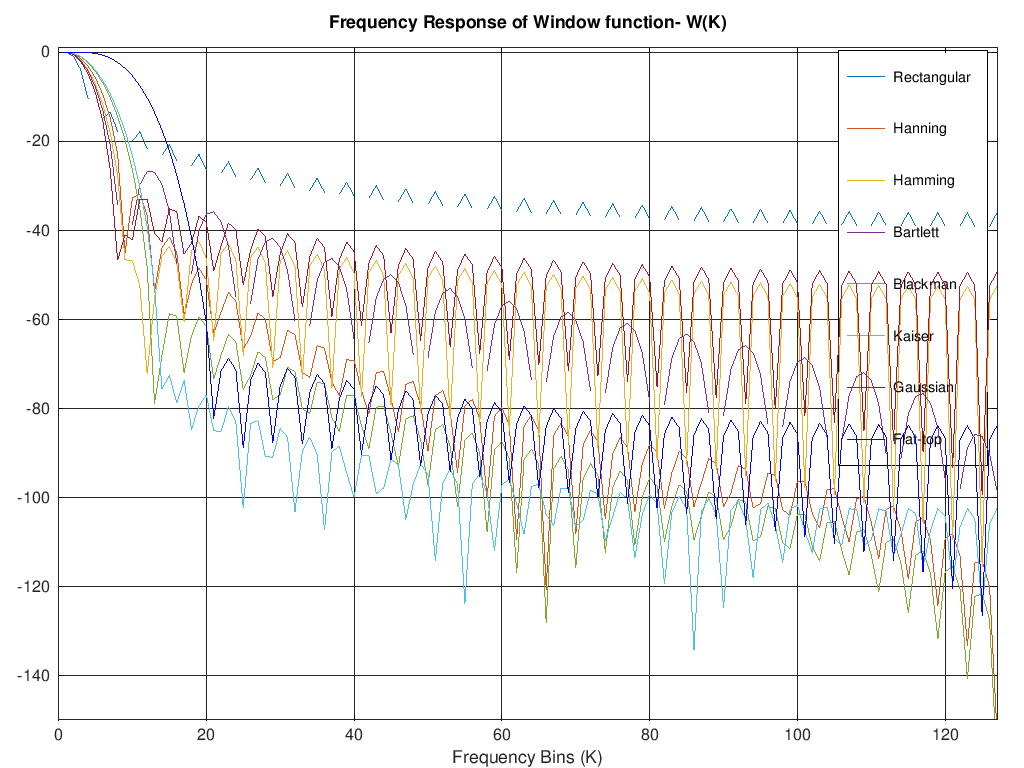

In [83]:
figure(fig++);
size(W_REC)
handle=plot(20*log10(abs(([W_REC W_HANN W_HAMMING W_BARTLETT W_BLACKMAN W_KAISER W_GAUSSIAN]))));
set(handle,'linewidth',1.5);hold on;
handle=plot(20*log10(abs(([W_FLATTOP]))),'b-');
set(handle,'linewidth',1.5);axis([0 length(W_REC)-1 -150 1]);grid on;
legend({'Rectangular','Hanning','Hamming','Bartlett','Blackman','Kaiser','Gaussian','Flat-top'},"location","northeast");
title('Frequency Response of Window function- W(K)');
xlabel('Frequency Bins (K)');%ylabel('Magnitude');

<div class="pagebreak"></div>

## Coherent Gain

$$CG=\frac{1}{N} \sum_{k=0}^{N-1} a(k)$$

In [84]:
function result=CG(wnd,nos)
  result=1./nos.*sum(wnd);
endfunction

In [85]:
CG_Rectangular=CG(w_rec,nos)

CG_Hanning=CG(w_hann,nos)

CG_Hamming=CG(w_hamming,nos)

CG_Bartlett=CG(w_bartlett,nos)

CG_Blackman=CG(w_blackman,nos)

CG_Kaiser=CG(w_kaiser,nos)

CG_Gaussian=CG(w_gaussian,nos)

CG_Flattop=CG(w_flattop,nos)

CG_Rectangular =  1
CG_Hanning =  0.49219
CG_Hamming =  0.53281
CG_Bartlett =  0.50000
CG_Blackman =  0.41344
CG_Kaiser =  0.39627
CG_Gaussian =  0.59087
CG_Flattop =  0.21280


##  Coherent Power Gain

$$CPG=\left(\frac{1}{N} \sum_{k=0}^{N-1} a(k)\right)^2$$

In [86]:
CPG_Rectangular=(CG_Rectangular).^2
%1.+(CPG_Rectangular)
CPG_Hanning=(CG_Hanning).^2
%1.+(CPG_Hanning)
CPG_Hamming=(CG_Hamming).^2
%1.+(CPG_Hamming)
CPG_Bartlett=(CG_Bartlett).^2
%1.+(CPG_Bartlett)
CPG_Blackman=(CG_Blackman).^2
%1.+(CPG_Blackman)
CPG_Kaiser=(CG_Kaiser).^2
%1.+(CPG_Kaiser)
CPG_Gaussian=(CG_Gaussian).^2
%1.+(CPG_Gaussian)
CPG_Flattop=(CG_Flattop).^2
%1.+(CPG_Flattop)

CPG_Rectangular =  1
CPG_Hanning =  0.24225
CPG_Hamming =  0.28389
CPG_Bartlett =  0.25000
CPG_Blackman =  0.17093
CPG_Kaiser =  0.15703
CPG_Gaussian =  0.34912
CPG_Flattop =  0.045282


<div class="pagebreak"></div>

## Equivalent Noise Bandwidth Calculations

In [87]:
function result=ENBW(wnd,nos)
  result=(CG(wnd.^2,nos))./(CG(wnd,nos).^2);
endfunction

In [88]:
#ENBW_Rectangular=(1./nos.*sum(w_rec.^2))/(CPG_Rectangular)
ENBW_Rectangular=ENBW(w_rec,nos)
#ENBW_Hanning=(1./nos.*sum(w_hann.^2))/(CPG_Hanning)
ENBW_Hanning=ENBW(w_hann,nos)
#ENBW_Hamming=(1./nos.*sum(w_hamming.^2))/(CPG_Hamming)
ENBW_Hamming=ENBW(w_hamming,nos)
#ENBW_Bartlett=(1./nos.*sum(w_bartlett.^2))/(CPG_Bartlett)
ENBW_Bartlett=ENBW(w_bartlett,nos)
#ENBW_Blackman=(1./nos.*sum(w_blackman.^2))/(CPG_Blackman)
ENBW_Blackman=ENBW(w_blackman,nos)
#ENBW_Kaiser=(1./nos.*sum(w_kaiser.^2))/(CPG_Kaiser)
ENBW_Kaiser=ENBW(w_kaiser,nos)
#ENBW_Gaussian=(1./nos.*sum(w_gaussian.^2))/(CPG_Gaussian)
ENBW_Gaussian=ENBW(w_gaussian,nos)
#ENBW_Flattop=(1./nos.*sum(w_flattop.^2))/(CPG_Flattop)
ENBW_Flattop=ENBW(w_flattop,nos)

ENBW_Rectangular =  1
ENBW_Hanning =  1.5238
ENBW_Hamming =  1.3783
ENBW_Bartlett =  1.3330
ENBW_Blackman =  1.7542
ENBW_Kaiser =  1.8237
ENBW_Gaussian =  1.2443
ENBW_Flattop =  3.8296


## Other functions to try
Bartlett-Hann Window

In [89]:
a0=0.62;a1=0.48;a2=0.38;
w_bartlett_hann=a0-a1*abs(n/(nos-1) - 1/2)-a2*cos(2*pi*n/(nos-1));
W_BARTLETT_HANN=freqz(w_bartlett_hann,1,f);
W_BARTLETT_HANN=W_BARTLETT_HANN/(max(abs(W_BARTLETT_HANN)));

In [90]:
sig=sin(2.*pi().*50.*(0:1./(nos-1):1));

ans =

  -13.459  -24.820



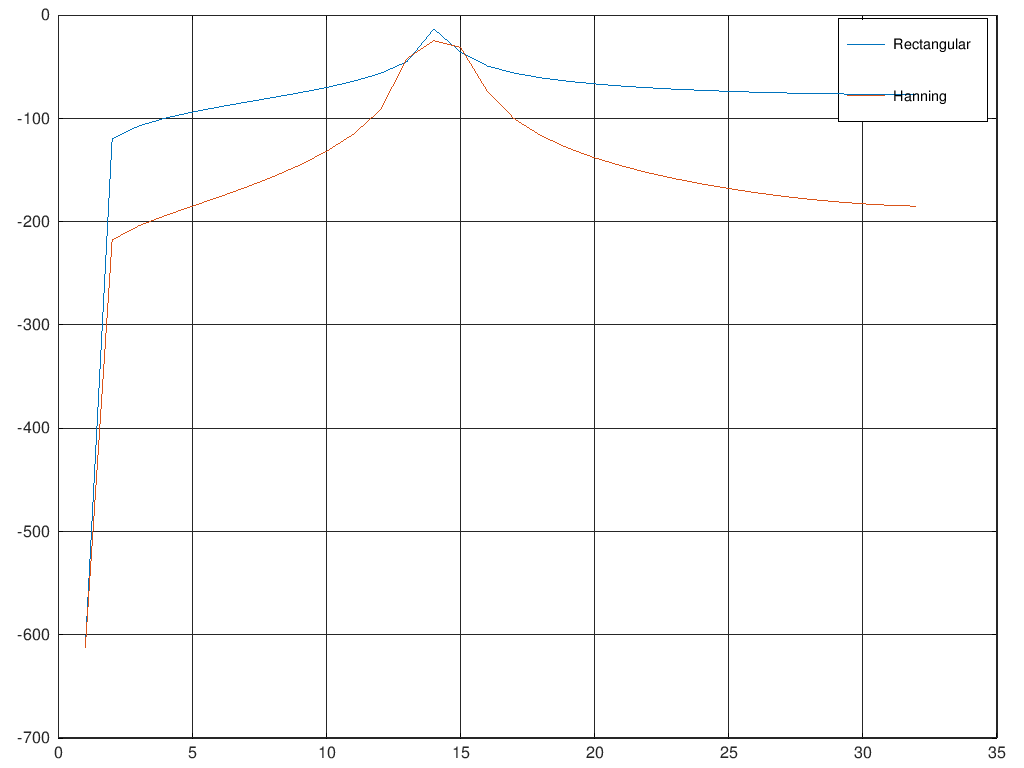

In [91]:
figure(fig++);
wsig_Rectangular=sig;
tmp=((fft(wsig_Rectangular).^2)./(nos.^2))(:,1:1:(nos./2));
S_REC=20.*log10(abs(tmp));
handle=plot(S_REC);
set(handle,'linewidth',1.0);hold on;
wsig_Hanning=sig.*w_hann;
tmp=((fft(wsig_Hanning).^2)./(nos.^2))(:,1:1:(nos./2));
S_HANN=20.*log10(abs(tmp));
handle=plot(S_HANN);
set(handle,'linewidth',1.0);grid on;
legend({'Rectangular','Hanning'},"location","northeast");

[max(S_REC) max(S_HANN)]